## Analyzing The Effect of Weather on Policing

In [115]:
import pandas as pd

In [116]:
pd.options.display.max_columns=99

In [117]:
import matplotlib.pyplot as plt

In [118]:
source_file_path = 'F:/Data Camp Courses/Analyzing Police Activity with Pandas/Analyzing the effect of weather on Policing/'

In [119]:
source_file_name = 'weather.csv'

In [120]:
weather = pd.read_csv(source_file_path + source_file_name, sep=',', parse_dates=['DATE'], index_col='DATE')

In [121]:
weather.shape

(4017, 26)

In [122]:
weather.columns

Index(['STATION', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22'],
      dtype='object')

In [123]:
weather.head()

,STATION,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01,USW00014765,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-02,USW00014765,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2005-01-03,USW00014765,49.0,44,53,6.93,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2005-01-04,USW00014765,42.0,39,45,6.93,16.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2005-01-05,USW00014765,36.0,28,43,7.83,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


## Plotting the temperature

In this exercise, you'll examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a box plot.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!


    Read weather.csv into a DataFrame named weather.
    Select the temperature columns (TMIN, TAVG, TMAX) and print their summary statistics using the .describe() method.
    Create a box plot to visualize the temperature columns.
    Display the plot.


In [124]:
weather[['TMIN','TAVG','TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


In [125]:
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box', figsize=(16,10), title='Temperature BOXPLOTS')

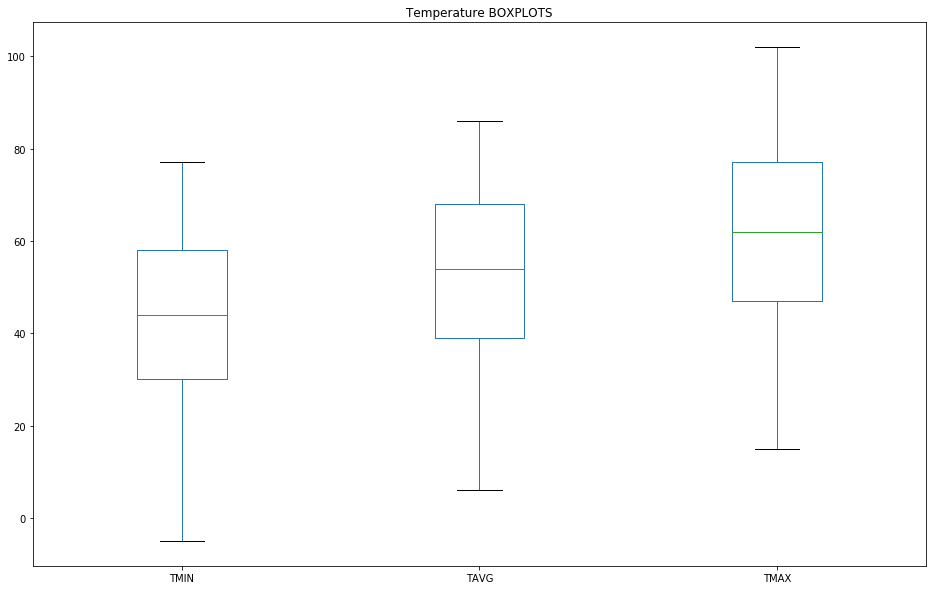

In [126]:
plt.show()

Nice job! The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.

## Plotting the temperature difference

In this exercise, you'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting histogram? Does it match your expectations, or do you see anything unusual?


    Create a new column in the weather DataFrame named TDIFF that represents the difference between the maximum and minimum temperatures.
    Print the summary statistics for TDIFF using the .describe() method.
    Create a histogram with 20 bins to visualize TDIFF.
    Display the plot.


In [127]:
weather['TDIFF']=weather['TMAX'] - weather['TMIN']

In [128]:
weather['TDIFF'].describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

In [129]:
weather['TDIFF'].plot(kind='hist', figsize=(16,10), bins=20)

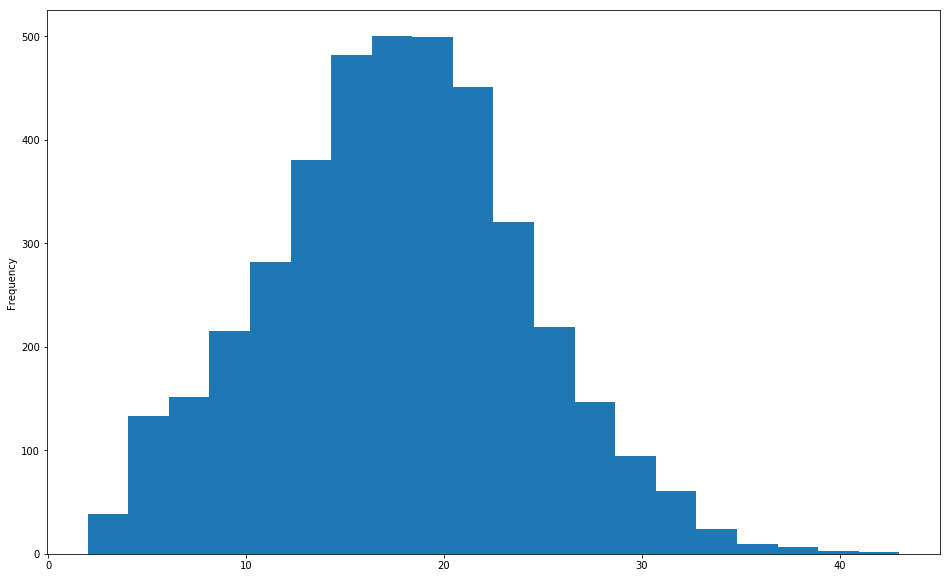

In [130]:
plt.show()

Great work! The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

## Counting bad weather conditions

The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

    WT05 indicates "Hail"
    WT11 indicates "High or damaging winds"
    WT17 indicates "Freezing rain"

For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

In this exercise, you'll quantify "how bad" the weather was each day by counting the number of 1 values in each row.


    Copy the columns WT01 through WT22 from weather to a new DataFrame named WT.
    Calculate the sum of each row in WT, and store the results in a new weather column named bad_conditions.
    Replace any missing values in bad_conditions with a 0. (This has been done for you.)
    Create a histogram to visualize bad_conditions, and then display the plot.


In [131]:
WT = weather.loc[:,'WT01':'WT22']

In [132]:
weather['bad_conditions'] = WT.sum(axis='columns')

In [133]:
weather['bad_conditions'] = weather['bad_conditions'].fillna(0).astype('int')

In [134]:
weather['bad_conditions'].plot(kind='hist')

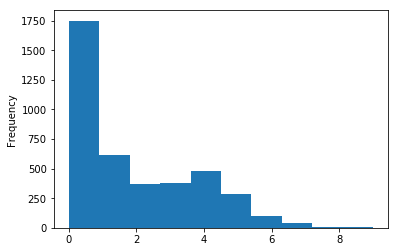

In [135]:
plt.show()

Excellent work! It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

    Convert 0 to 'good'
    Convert 1 through 4 to 'bad'
    Convert 5 through 9 to 'worse'


    Count the unique values in the bad_conditions column and sort the index. (This has been done for you.)
    Create a dictionary called mapping that maps the bad_conditions integers to strings as specified above.
    Convert the bad_conditions integers to strings using the mapping and store the results in a new column called rating.
    Count the unique values in rating to verify that the integers were properly converted to strings.

    Take Hint (-30 XP)

In [136]:
weather['bad_conditions'].value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [137]:
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad',
          5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'
          }

In [138]:
weather['rating']=weather['bad_conditions'].map(mapping)

In [139]:
weather['rating'].value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

Nice job! This rating system should make the weather condition data easier to understand.

## Changing the data type to category

Since the rating column only has a few possible values, you'll change its data type to category in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.


    Create a list object called cats that lists the weather ratings in a logical order: 'good', 'bad', 'worse'.
    Change the data type of the rating column from object to category. Make sure to use the cats list to define the category ordering.
    Examine the head of the rating column to confirm that the categories are logically ordered.


In [140]:
cats = ['good', 'bad','worse']

In [141]:
weather['rating'] = weather['rating'].astype('category', ordered=True, categories=cats)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [142]:
weather['rating'].head()

DATE
2005-01-01    bad
2005-01-02    bad
2005-01-03    bad
2005-01-04    bad
2005-01-05    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

Excellent! You'll use the rating column in future exercises to analyze the effects of weather on police behavior.

Preparing the DataFrames

In this exercise, you'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

    With the ri DataFrame, you'll move the stop_datetime index to a column since the index will be lost during the merge.
    With the weather DataFrame, you'll select the DATE and rating columns and put them in a new DataFrame.
    
    
    Reset the index of the ri DataFrame.
    Examine the head of ri to verify that stop_datetime is now a DataFrame column, and the index is now the default integer index.
    Create a new DataFrame named weather_rating that contains only the DATE and rating columns from the weather DataFrame.
    Examine the head of weather_rating to verify that it contains the proper columns.



In [143]:
source_path = 'F:/Data Camp Courses/Analyzing Police Activity with Pandas/Visual Exploratory Analysis/'

In [144]:
source_file = 'ri_cleansed.csv'

In [145]:
ri = pd.read_csv(source_path + source_file, sep=',', parse_dates=['stop_datetime', 'stop_date'], index_col='stop_datetime')

In [146]:
ri.reset_index(inplace=True)

In [147]:
ri.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [148]:
weather.reset_index(inplace=True)

In [149]:
weather_rating = weather.loc[:, ['DATE', 'rating']]

In [150]:
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


Great work! The ri and weather_rating DataFrames are now ready to be merged.

## Merging the DataFrames

In this exercise, you'll merge the ri and weather_rating DataFrames into a new DataFrame, ri_weather.

The DataFrames will be joined using the stop_date column from ri and the DATE column from weather_rating. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set stop_datetime as the index, which is the column you saved in the previous exercise.


    Examine the shape of the ri DataFrame.
    Merge the ri and weather_rating DataFrames using a left join.
    Examine the shape of ri_weather to confirm that it has two more columns but the same number of rows as ri.
    Replace the index of ri_weather with the stop_datetime column.


In [151]:
ri.shape

(86536, 14)

In [152]:
ri.dtypes

stop_datetime         datetime64[ns]
stop_date             datetime64[ns]
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
dtype: object

In [153]:
weather.dtypes

DATE              datetime64[ns]
STATION                   object
TAVG                     float64
TMIN                       int64
TMAX                       int64
AWND                     float64
WSF2                     float64
WT01                     float64
WT02                     float64
WT03                     float64
WT04                     float64
WT05                     float64
WT06                     float64
WT07                     float64
WT08                     float64
WT09                     float64
WT10                     float64
WT11                     float64
WT13                     float64
WT14                     float64
WT15                     float64
WT16                     float64
WT17                     float64
WT18                     float64
WT19                     float64
WT21                     float64
WT22                     float64
TDIFF                      int64
bad_conditions             int32
rating                  category
dtype: obj

In [154]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

In [155]:
ri_weather.shape

(86536, 16)

In [156]:
ri_weather.set_index('stop_datetime', inplace=True)

Fantastic! In the next section, you'll use ri_weather to analyze the relationship between weather conditions and police behavior.

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

    First, you'll calculate the overall arrest rate.
    Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.
    Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, good < bad < worse, they will be sorted that way in the results.

Calculate the overall arrest rate by taking the mean of the is_arrested Series.

Calculate the arrest rate for each weather rating using a .groupby().

Calculate the arrest rate for each combination of violation and rating. How do the arrest rates differ by group?

In [158]:
ri_weather.is_arrested.mean()

0.0355690117407784

In [160]:
ri_weather.groupby('rating')['is_arrested'].mean()

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

In [163]:
ri_weather.groupby(['violation', 'rating'], as_index=False)['is_arrested'].mean()

,violation,rating,is_arrested
0,Equipment,good,0.059007
1,Equipment,bad,0.066311
2,Equipment,worse,0.097357
3,Moving violation,good,0.056227
4,Moving violation,bad,0.058050
5,Moving violation,worse,0.065860
6,Other,good,0.076966
7,Other,bad,0.087443
8,Other,worse,0.062893
9,Registration/plates,good,0.081574


Wow! The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!

Selecting from a multi-indexed Series

The output of a single .groupby() operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:

    The outer index level is like the DataFrame rows.
    The inner index level is like the DataFrame columns.

In this exercise, you'll practice accessing data from a multi-indexed Series using the .loc[] accessor.


    Save the output of the .groupby() operation from the last exercise as a new object, arrest_rate. (This has been done for you.)
    Print the arrest_rate Series and examine it.
    Print the arrest rate for moving violations in bad weather.
    Print the arrest rates for speeding violations in all three weather conditions.


In [166]:
arrest_rate = ri_weather.groupby(['violation', 'rating'], as_index=True)['is_arrested'].mean()

In [168]:
arrest_rate

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

In [169]:
arrest_rate.loc['Moving violation']

rating
good     0.056227
bad      0.058050
worse    0.065860
Name: is_arrested, dtype: float64

In [170]:
arrest_rate.loc['Moving violation', 'bad']

0.05804964058049641

In [171]:
arrest_rate.loc['Speeding']

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64

Great job! The .loc[] accessor is a powerful and flexible tool for data selection.

Reshaping the arrest rate data

In this exercise, you'll start by reshaping the arrest_rate Series into a DataFrame. This is a useful step when working with any multi-indexed Series, since it enables you to access the full range of DataFrame methods.

Then, you'll create the exact same DataFrame using a pivot table. This is a great example of how pandas often gives you more than one way to reach the same result!


    Unstack the arrest_rate Series to reshape it into a DataFrame.
    Create the exact same DataFrame using a pivot table! Each of the three .pivot_table() parameters should be specified as one of the ri_weather columns.


In [172]:
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


In [173]:
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


Excellent work! In the future, when you need to create a DataFrame like this, you can choose whichever method makes the most sense to you.